# Introduction to Visualization with Python

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/dvddepennde/crops_public_data/main/Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Main libraries: **Matplotlib** and **Seaborn**

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

## Histogram

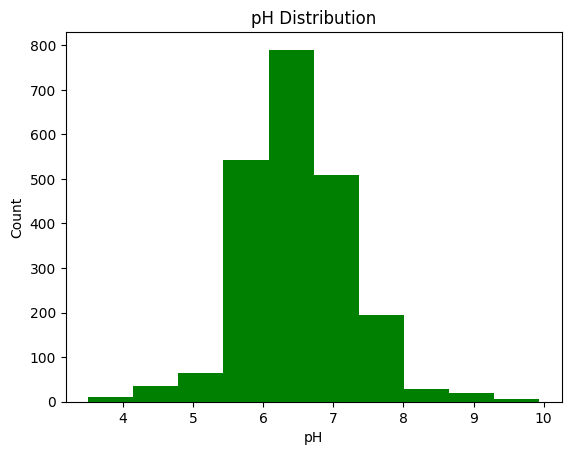

In [37]:
plt.hist(data['ph'], color='green')
plt.title('pH Distribution')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

## Scatterplot between temperature and humidity with **Matplotlib**

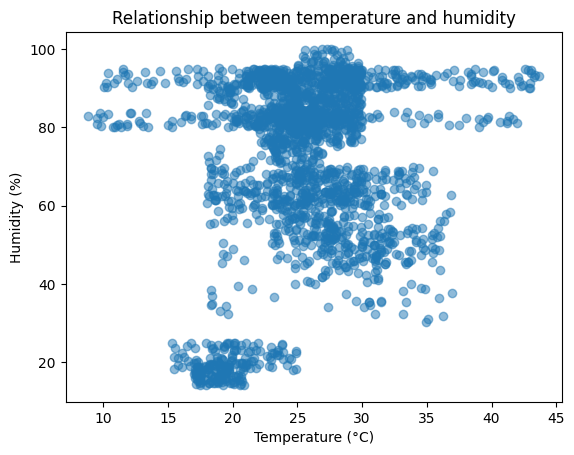

In [40]:
plt.scatter(data['temperature'], data['humidity'], alpha=0.5)
plt.title('Relationship between temperature and humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()


## Scatterplot between the variables N and P with **Seaborn**

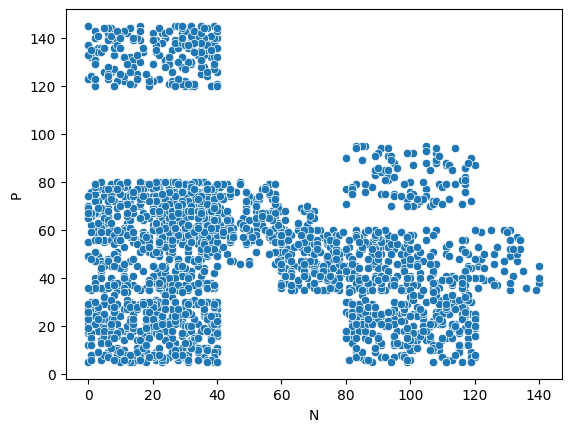

In [ ]:
sns.scatterplot(data=data, x='N', y='P')
plt.show()

## Bar plot

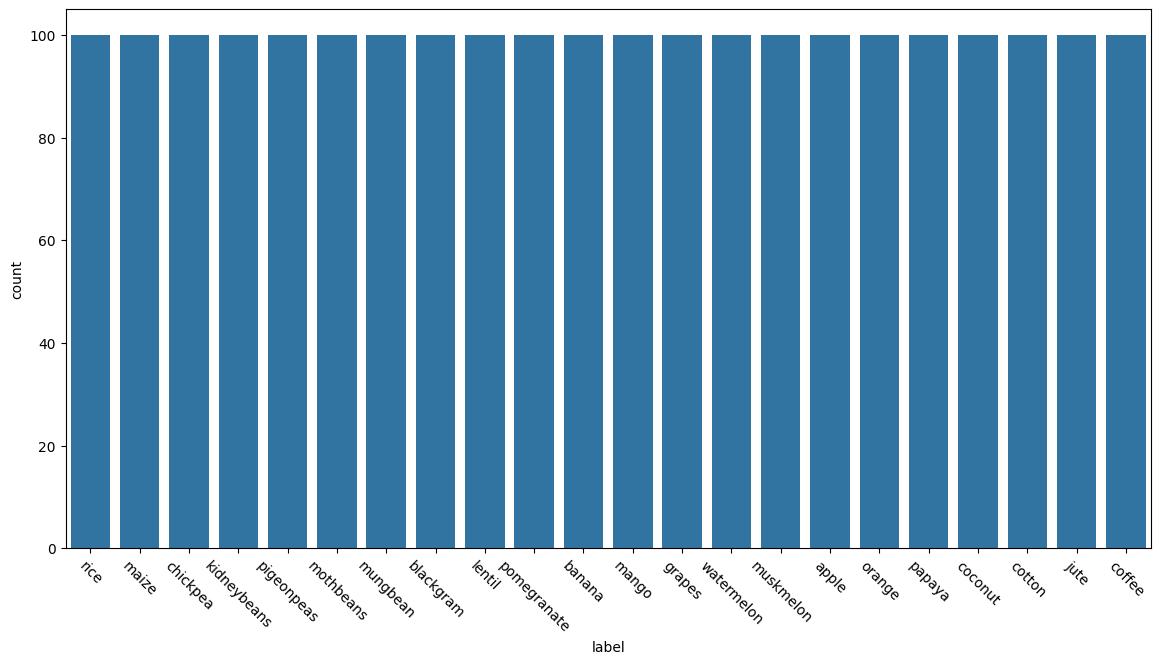

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='label', data=data)
plt.xticks(rotation=-45)
#plt.savefig('grafico.png') # To save locally as a image file

## Mean bar plot

In [41]:
# Grouping and obtaining the mean
data.groupby('label')['rainfall'].mean().head(3)

label
apple        112.654779
banana       104.626980
blackgram     67.884151
Name: rainfall, dtype: float64

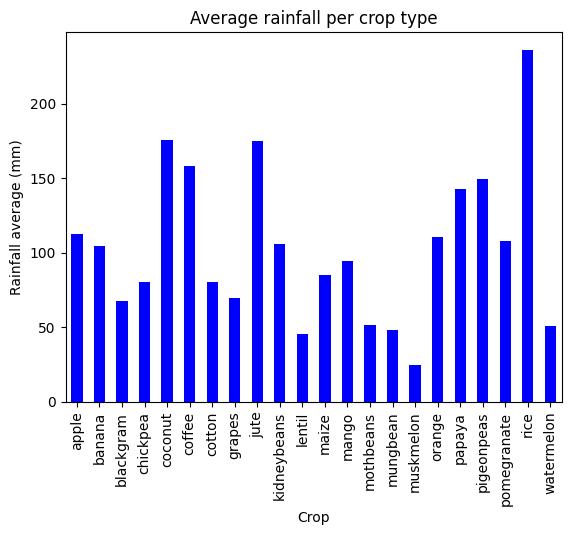

In [44]:
# Grouping and obtaining the mean
rainfall_means = data.groupby('label')['rainfall'].mean()


rainfall_means.plot(kind='bar', color='blue')


plt.title('Average rainfall per crop type')
plt.xlabel('Crop')
plt.ylabel('Rainfall average (mm)')
plt.xticks(rotation=90)
plt.show()

## Sorted Bar plot

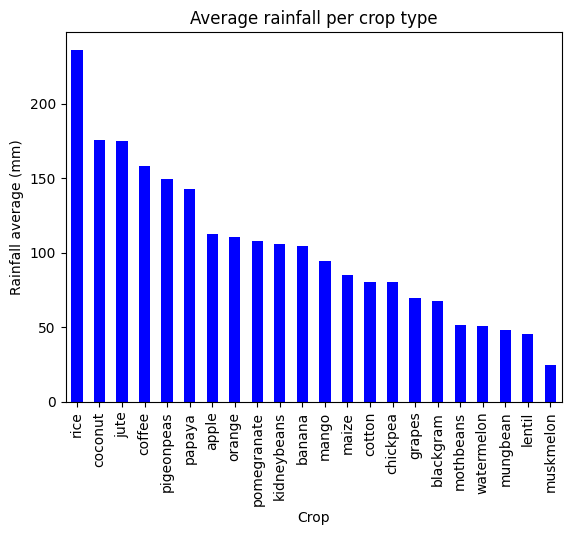

In [45]:
rainfall_means = data.groupby('label')['rainfall'].mean()

rainfall_means = rainfall_means.sort_values(ascending=False)

rainfall_means.plot(kind='bar', color='blue')
plt.title('Average rainfall per crop type')
plt.xlabel('Crop')
plt.ylabel('Rainfall average (mm)')
plt.xticks(rotation=90)
plt.show()

## Boxplot of the temperature

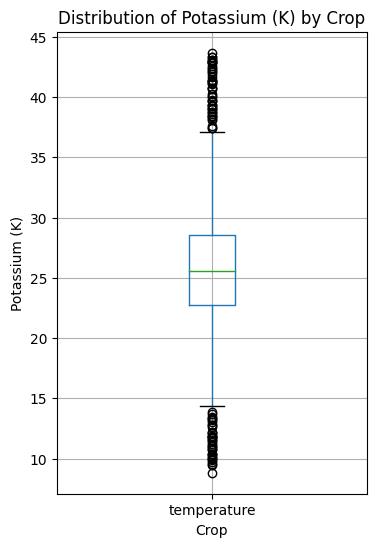

In [47]:
plt.figure(figsize=(4, 6))
data.boxplot(column='temperature')

plt.title('Distribution of Potassium (K) by Crop')
plt.xlabel('Crop')
plt.ylabel('Potassium (K)')

plt.show()

## Boxplot of multiple columns

In [ ]:
# Create a new DataFrame including only target columns
nutrients = data[['N', 'P', 'K', 'label']]

<Figure size 400x600 with 0 Axes>

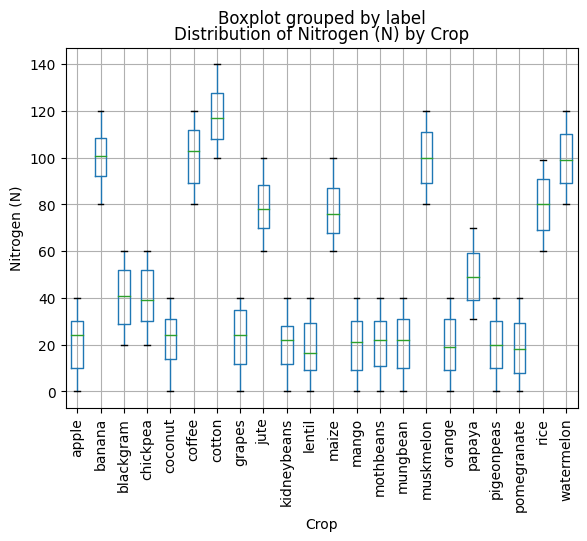

In [48]:
plt.figure(figsize=(4, 6))
nutrients.boxplot(column='N', by='label')

plt.title('Distribution of Nitrogen (N) by Crop')
plt.xlabel('Crop')
plt.ylabel('Nitrogen (N)')

plt.xticks(rotation=90)  # Rotate the tags
plt.show()

<Figure size 400x600 with 0 Axes>

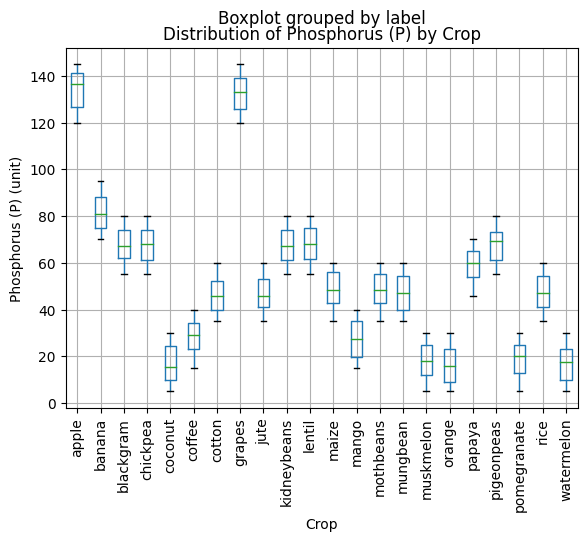

In [51]:
plt.figure(figsize=(4, 6))
nutrients.boxplot(column='P', by='label')

plt.title('Distribution of Phosphorus (P) by Crop')
plt.xlabel('Crop')
plt.ylabel('Phosphorus (P) (unit)')

plt.xticks(rotation=90)
plt.show()

## Density Diagram

Just the bars:

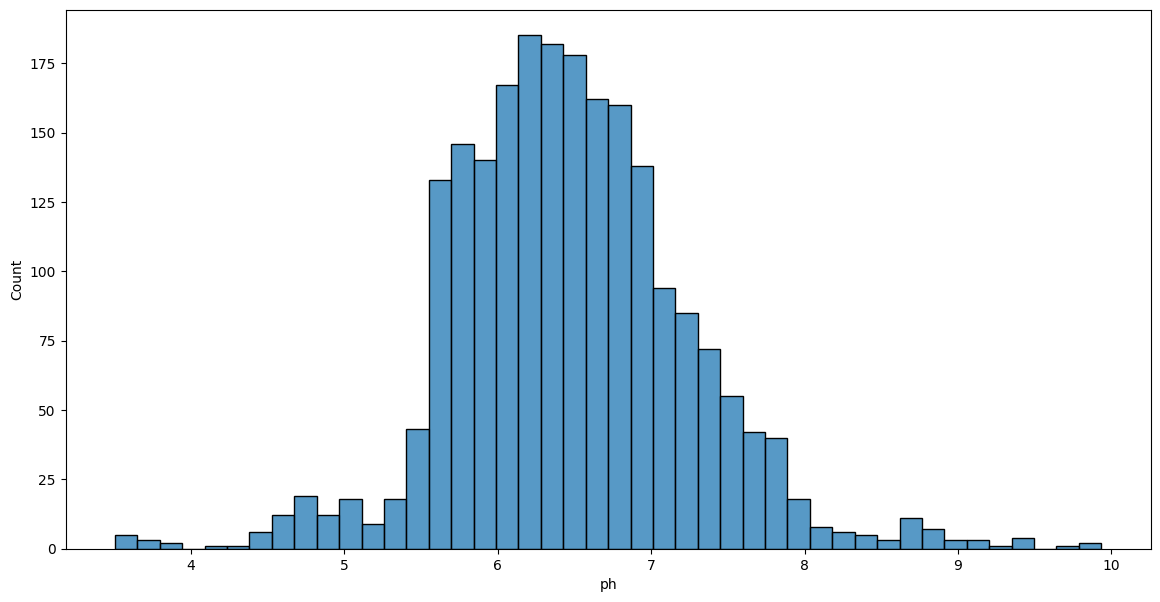

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='ph')
plt.show()

The density represented as a curve:

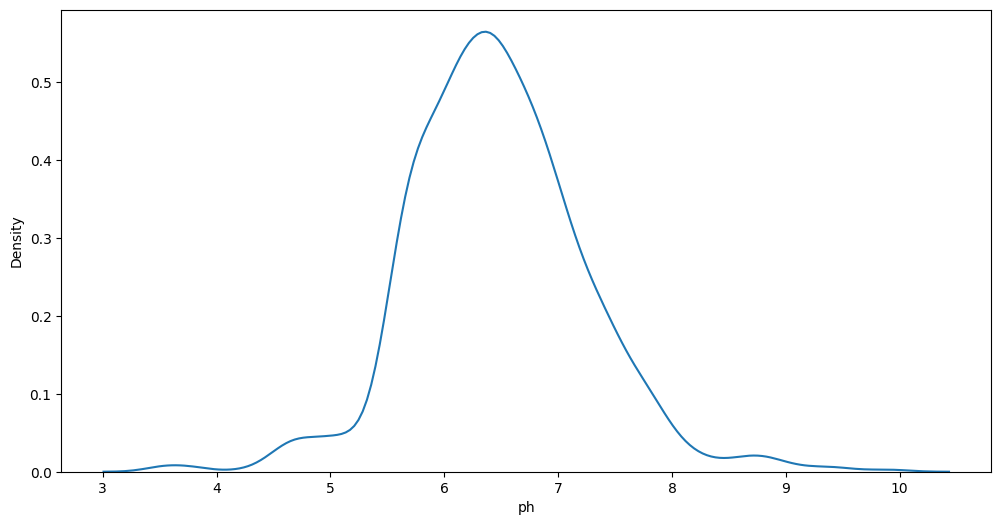

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=data, x='ph')
plt.show()

Both of them joined in the same diagram:

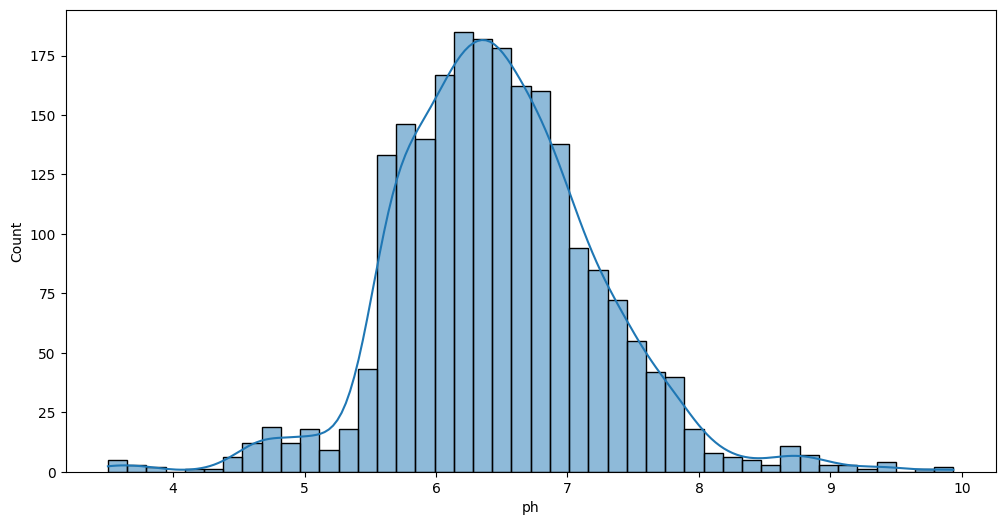

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='ph', kde=True)
plt.show()

## Pie Chart

Here we aim to view the distribution between each class:

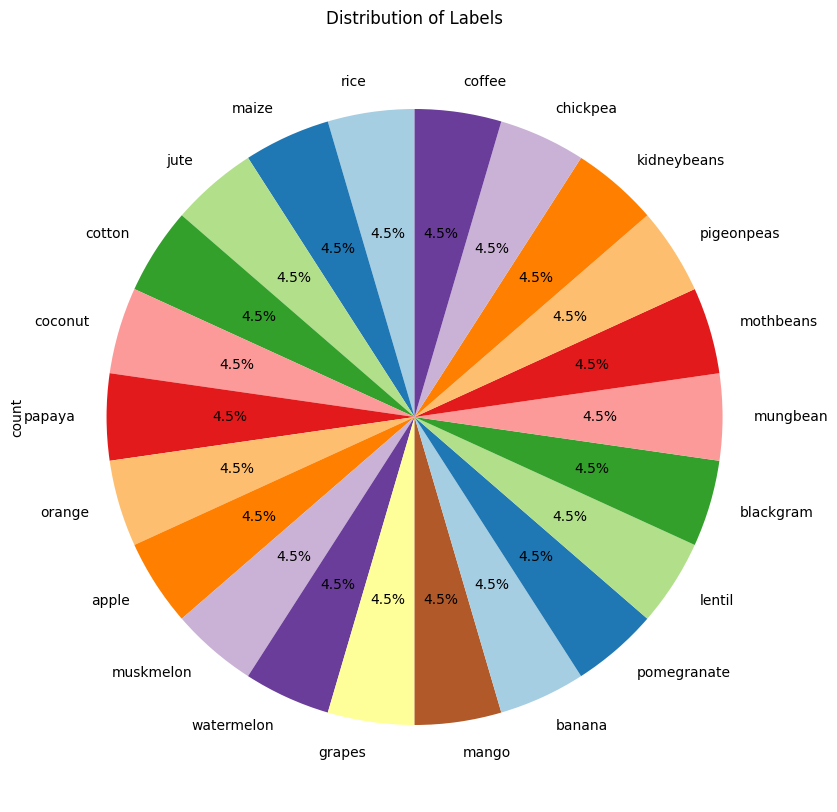

In [53]:
label_counts = data['label'].value_counts()

plt.figure(figsize=(15, 10))
label_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Distribution of Labels')
plt.show()

## Violin Plot

<ipython-input-54-44f4e7d357f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='N', data=filtered_data, palette='Paired')


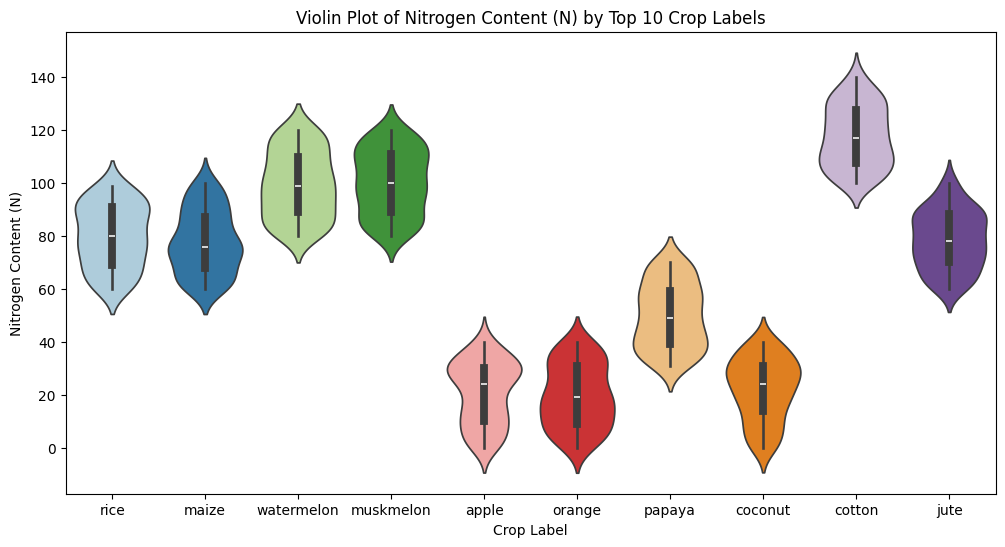

In [54]:
# Find the top 10 most common labels
top_10_labels = data['label'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 labels
filtered_data = data[data['label'].isin(top_10_labels)]

# Create the violin plot with the filtered labels
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='N', data=filtered_data, palette='Paired')

# Set the title and axis labels
plt.title('Violin Plot of Nitrogen Content (N) by Top 10 Crop Labels')
plt.xlabel('Crop Label')
plt.ylabel('Nitrogen Content (N)')

# Show the plot
plt.show()

## Heat map | Correlation Map



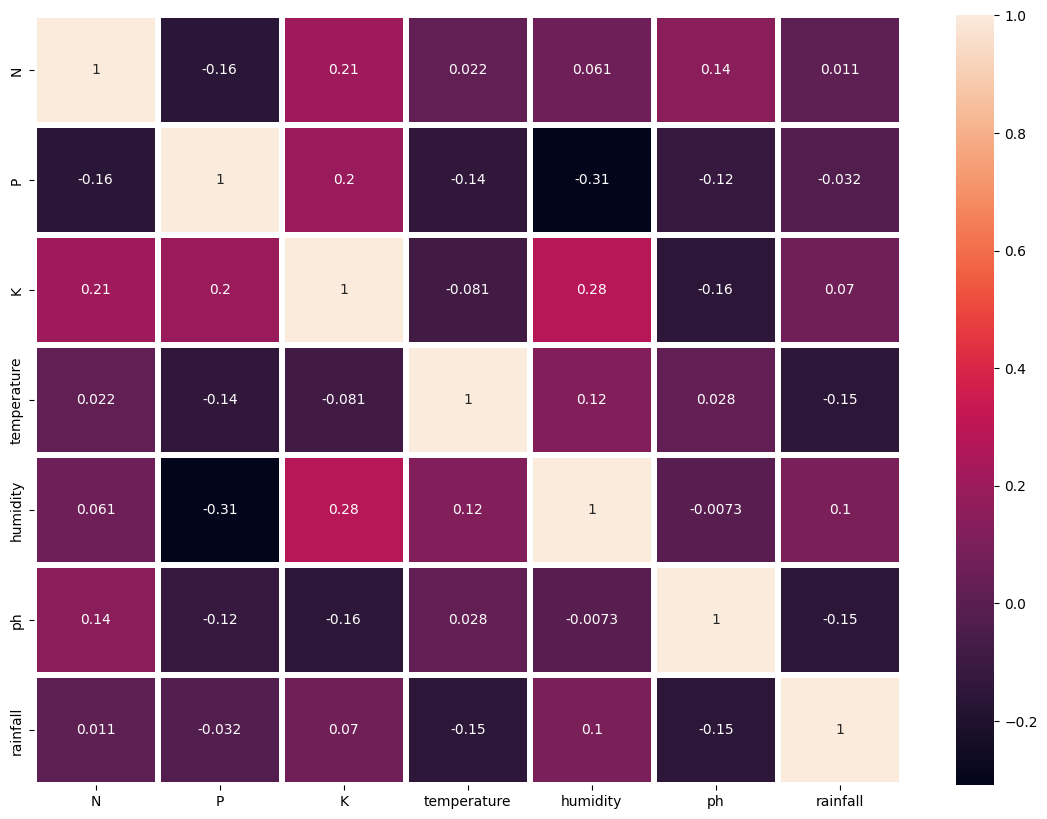

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr('spearman'), annot=True, linewidth=3)
plt.show()